<a href="https://colab.research.google.com/github/viettuan1120/CSx101-A1-2021-02/blob/main/BTXLA_W35.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Metric


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from skimage.util import random_noise
from skimage.metrics import peak_signal_noise_ratio, mean_squared_error, structural_similarity
from sklearn.metrics import mean_absolute_error
%matplotlib inline



In [ ]:
captain = cv2.imread('/content/captain2.jpg')

In [ ]:
captain.shape

(665, 563, 3)

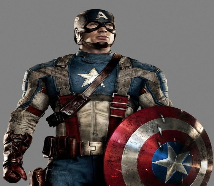

In [ ]:
# resize
cap_res = cv2.resize(captain, None, fx=.38, fy=.28)
cv2_imshow(cap_res)

In [ ]:
cap_res.shape

(186, 214, 3)

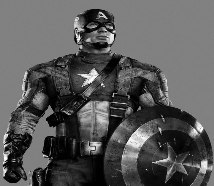

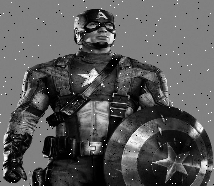

In [ ]:
# convert to gray scale
captain_gray = cv2.cvtColor(cap_res, cv2.COLOR_BGR2GRAY)
cv2_imshow(captain_gray)
# add noise
noise_img = random_noise(captain_gray, mode='s&p', amount= 0.01)
noise_img = np.array(255 * noise_img, dtype= 'uint8')
cv2_imshow(noise_img)

/usr/local/lib/python3.7/dist-packages/skimage/metrics/simple_metrics.py:160: RuntimeWarning: divide by zero encountered in double_scalars
  return 10 * np.log10((data_range ** 2) / err)
/usr/local/lib/python3.7/dist-packages/skimage/metrics/simple_metrics.py:160: RuntimeWarning: divide by zero encountered in double_scalars
  return 10 * np.log10((data_range ** 2) / err)


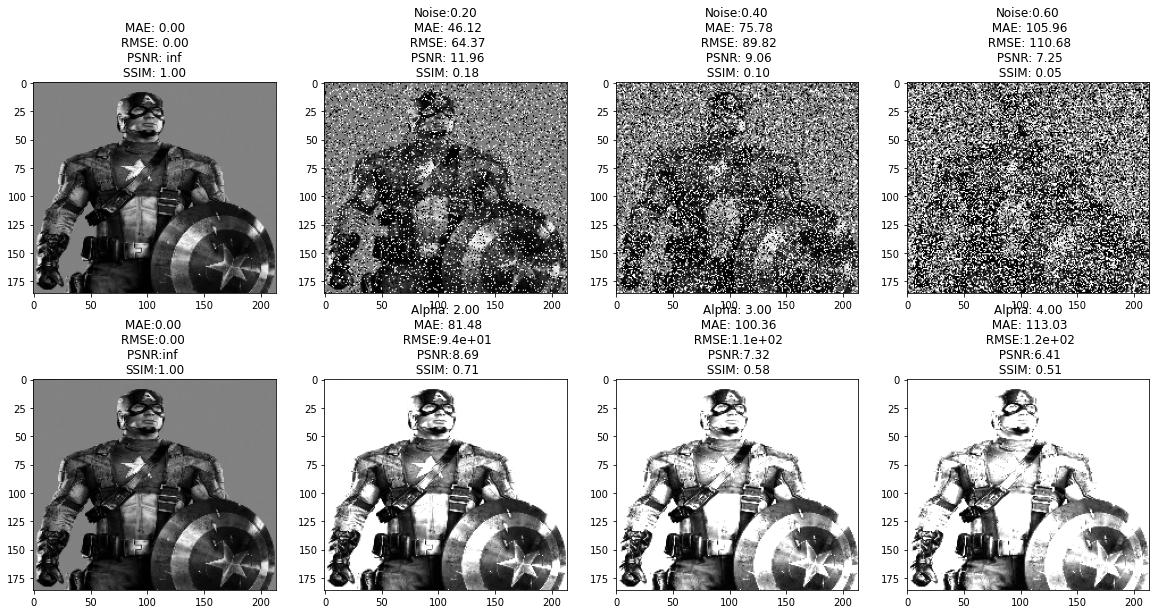

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(20,10))

axes[0][0].imshow(captain_gray, cmap='gray')
axes[0][0].set_title("MAE: {:.02f}\nRMSE: {:.02f}\nPSNR: {:.02f}\nSSIM: {:0.2f}".format(
                                                                                        mean_absolute_error(captain_gray,captain_gray),
                                                                                        np.sqrt(mean_squared_error(captain_gray,captain_gray)),
                                                                                        peak_signal_noise_ratio(captain_gray,captain_gray),
                                                                                        structural_similarity(captain_gray,captain_gray)
                                                                                        ))
axes[1][0].imshow(captain_gray, cmap='gray')
axes[1][0].set_title("MAE:{:.02f} \nRMSE:{:.02f} \nPSNR:{:.02f} \nSSIM:{:0.2f}".format(
                                                                                        mean_absolute_error(captain_gray,captain_gray),
                                                                                        np.sqrt(mean_squared_error(captain_gray,captain_gray)),
                                                                                        peak_signal_noise_ratio(captain_gray,captain_gray),
                                                                                        structural_similarity(captain_gray,captain_gray)
                                                                                        ))
for i in range(1,4):
  noise = 0.2 * i
  noise_img = random_noise(captain_gray, mode='s&p',amount= noise)
  noise_img = np.array(255 * noise_img, dtype= 'uint8')
  axes[0][i].imshow(noise_img, cmap='gray')
  axes[0][i].set_title("Noise:{:.02f}\n MAE: {:.02f}\n RMSE: {:.02f}\n PSNR: {:.02f}\n SSIM: {:0.2f}".format(noise,
                                                                                         mean_absolute_error(captain_gray,noise_img),
                                                                                         np.sqrt(mean_squared_error(captain_gray,noise_img)),
                                                                                         peak_signal_noise_ratio(captain_gray,noise_img),
                                                                                         structural_similarity(captain_gray,noise_img)
                                                                                         ))
for i in range(1,4):
  alpha = i + 1
  new_image = cv2.convertScaleAbs(captain_gray, alpha=alpha)
  axes[1][i].imshow(new_image, cmap='gray')
  axes[1][i].set_title("Alpha: {:.02f}\n MAE: {:.02f}\n RMSE:{:.02}\n PSNR:{:.02f}\n SSIM: {:0.2f}".format(alpha,
                                                                                         mean_absolute_error(captain_gray,new_image),
                                                                                         np.sqrt(mean_squared_error(captain_gray,new_image)),
                                                                                         peak_signal_noise_ratio(captain_gray,new_image),
                                                                                         structural_similarity(captain_gray,new_image)
                                                                                         ))









# Mục mới